In [1]:
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

os.chdir("..")
os.chdir("..")
from driver_folder.time_driver import TimerError

In [2]:
T = TimerError()
T.start()
end_time = T.elapsed()
print(f"time taken:{end_time}")

time taken:1.8425998860038817e-05


In [3]:
def kruskal(adj_list):
    """
    Implements Kruskal's algorithm to find the Minimum Spanning Tree (MST) of a graph.

    Args:
    adj_list (dict): A dictionary representing the adjacency list of the graph.

    Returns:
    list: A list of tuples representing the edges in the MST.
    """
    edges = []
    component = {}
    mst_edges = []

    # Convert adjacency list to a list of edges with weights
    for node in adj_list.keys():
        # Weight as the first component to sort easily
        edges.extend(
            [(weight, node, neighbor) for (neighbor, weight) in adj_list[node]]
        )
        component[node] = node

    # Sort edges by weight
    edges.sort()

    # Iterate over sorted edges and construct MST
    for weight, u, v in edges:
        if component[u] != component[v]:
            mst_edges.append((u, v))
            old_component = component[u]
            new_component = component[v]
            for node in component.keys():
                if component[node] == old_component:
                    component[node] = new_component

    return mst_edges

Certainly! Let's enhance your `kruskal` function by renaming the variables for better readability, formatting the code properly, adding comments for clarity, and providing a description. We'll also include the necessary functions to plot the original graph and the MST generated by Kruskal's algorithm.

### Enhanced `kruskal` Function
### Explanation of the Enhanced Code:
1. **Function `kruskal`**:
    - **`adj_list`**: The adjacency list of the graph.
    - **`edges`**: A list to store all edges with their weights.
    - **`component`**: A dictionary to track the component (connected component) of each node.
    - **`mst_edges`**: A list to store the edges of the Minimum Spanning Tree (MST).
    - Converts the adjacency list to a list of edges with weights.
    - Sorts the edges by weight.
    - Iterates over the sorted edges to construct the MST, using the component dictionary to avoid cycles.
    - Returns the list of MST edges.

2. **Graph Construction and Plotting**:
    - Constructs the original graph and MST using NetworkX.
    - Plots the original graph and MST side-by-side with labeled nodes and edge weights using Matplotlib and NetworkX.

### Output:
- The code prints the edges in the MST.
- It displays two plots: the original graph and the Minimum Spanning Tree (MST).

In [4]:
# Example usage
weighted_adj_list = {
    0: [(1, 10), (7, 8)],
    1: [(0, 10), (2, 1), (5, 2)],
    2: [(1, 1), (3, 1), (5, -2), (2, -4)],
    3: [(2, 1), (4, 3)],
    4: [(3, 3), (5, -1)],
    5: [(4, -1), (6, -1), (2, -2)],
    6: [(5, -1), (7, 1)],
    7: [(6, 1), (0, 8)],
}

mst_edges = kruskal(weighted_adj_list)
print("MST Edges:", mst_edges)

MST Edges: [(2, 5), (4, 5), (5, 6), (1, 2), (2, 3), (6, 7), (0, 7)]


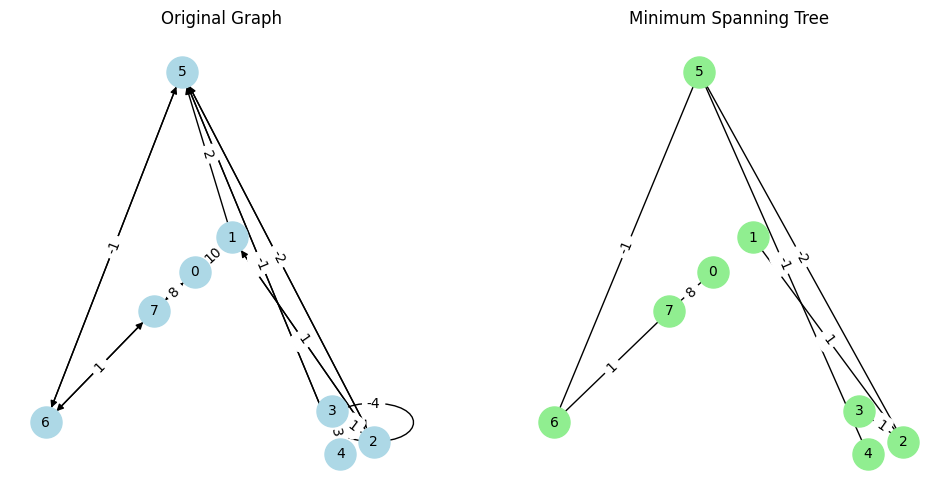

In [6]:
# Create a NetworkX graph for the original graph
G = nx.DiGraph()
for u in weighted_adj_list.keys():
    for v, weight in weighted_adj_list[u]:
        G.add_edge(u, v, weight=weight)

# Create a NetworkX graph for the MST
MST = nx.Graph()
for u, v in mst_edges:
    for neighbor, weight in weighted_adj_list[u]:
        if neighbor == v:
            MST.add_edge(u, v, weight=weight)
            break

# Plot the original graph
pos = nx.spring_layout(G)  # Positions for all nodes
plt.figure(figsize=(12, 6))

plt.subplot(121)
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color="lightblue",
    node_size=500,
    font_size=10,
    arrows=True,
)
edge_labels = {(u, v): f'{d["weight"]:.0f}' for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.title("Original Graph")

# Plot the Minimum Spanning Tree
plt.subplot(122)
nx.draw(
    MST, pos, with_labels=True, node_color="lightgreen", node_size=500, font_size=10
)
mst_edge_labels = {(u, v): f'{d["weight"]:.0f}' for u, v, d in MST.edges(data=True)}
nx.draw_networkx_edge_labels(MST, pos, edge_labels=mst_edge_labels, font_size=10)
plt.title("Minimum Spanning Tree")

plt.show()